#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [33]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [34]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [35]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [36]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [37]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [39]:
model = Sequential()

In [40]:
#卷積層1

In [41]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [42]:
model.add(Dropout(rate=0.25))

In [43]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [44]:
#卷積層2與池化層2

In [45]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [46]:
model.add(Dropout(0.25))

In [47]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [48]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [49]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [50]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [51]:
model.add(Dense(10, activation='softmax'))

In [52]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

In [55]:
model_mse = Sequential()
model_mse = model

model_binary = Sequential()
model_binary = model

# 載入之前訓練的模型

In [56]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [57]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

train_history_categorical = model.fit(x_img_train_normalize, y_label_train_OneHot, validation_split=0.25, epochs=10, batch_size=128, verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/10
37500/37500 [==============================] - 36s 965us/step - loss: 2.1438 - accuracy: 0.2124 - val_loss: 2.0258 - val_accuracy: 0.3210
Epoch 2/10
37500/37500 [==============================] - 36s 950us/step - loss: 1.9199 - accuracy: 0.3146 - val_loss: 1.9213 - val_accuracy: 0.3579
Epoch 3/10
37500/37500 [==============================] - 36s 963us/step - loss: 1.7823 - accuracy: 0.3728 - val_loss: 1.7880 - val_accuracy: 0.4114
Epoch 4/10
37500/37500 [==============================] - 36s 963us/step - loss: 1.6880 - accuracy: 0.3984 - val_loss: 1.7052 - val_accuracy: 0.4386
Epoch 5/10
37500/37500 [==============================] - 36s 951us/step - loss: 1.6133 - accuracy: 0.4220 - val_loss: 1.6329 - val_accuracy: 0.4579
Epoch 6/10
37500/37500 [==============================] - 36s 956us/step - loss: 1.5478 - accuracy: 0.4448 - val_loss: 1.5875 - val_accuracy: 0.4707
Epoch 7/10
37500/37500 [==============================] 

In [59]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

train_history_mse = model.fit(x_img_train_normalize, y_label_train_OneHot, validation_split=0.25, epochs=10, batch_size=128, verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/10
37500/37500 [==============================] - 39s 1ms/step - loss: 0.0625 - accuracy: 0.5123 - val_loss: 0.0648 - val_accuracy: 0.5258
Epoch 2/10
37500/37500 [==============================] - 38s 1ms/step - loss: 0.0623 - accuracy: 0.5141 - val_loss: 0.0646 - val_accuracy: 0.5276
Epoch 3/10
37500/37500 [==============================] - 37s 991us/step - loss: 0.0624 - accuracy: 0.5115 - val_loss: 0.0645 - val_accuracy: 0.5309
Epoch 4/10
37500/37500 [==============================] - 37s 989us/step - loss: 0.0622 - accuracy: 0.5151 - val_loss: 0.0644 - val_accuracy: 0.5305
Epoch 5/10
37500/37500 [==============================] - 37s 990us/step - loss: 0.0621 - accuracy: 0.5180 - val_loss: 0.0644 - val_accuracy: 0.5302
Epoch 6/10
37500/37500 [==============================] - 38s 1ms/step - loss: 0.0621 - accuracy: 0.5157 - val_loss: 0.0644 - val_accuracy: 0.5313
Epoch 7/10
37500/37500 [==============================] - 37s 

In [60]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

train_history_binary = model.fit(x_img_train_normalize, y_label_train_OneHot, validation_split=0.25, epochs=10, batch_size=128, verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/10
37500/37500 [==============================] - 37s 995us/step - loss: 0.2098 - accuracy: 0.9181 - val_loss: 0.2188 - val_accuracy: 0.9124
Epoch 2/10
37500/37500 [==============================] - 37s 988us/step - loss: 0.2095 - accuracy: 0.9178 - val_loss: 0.2178 - val_accuracy: 0.9130
Epoch 3/10
37500/37500 [==============================] - 37s 989us/step - loss: 0.2084 - accuracy: 0.9185 - val_loss: 0.2177 - val_accuracy: 0.9129
Epoch 4/10
37500/37500 [==============================] - 37s 982us/step - loss: 0.2080 - accuracy: 0.9186 - val_loss: 0.2169 - val_accuracy: 0.9133
Epoch 5/10
37500/37500 [==============================] - 37s 983us/step - loss: 0.2077 - accuracy: 0.9185 - val_loss: 0.2163 - val_accuracy: 0.9133
Epoch 6/10
37500/37500 [==============================] - 37s 979us/step - loss: 0.2070 - accuracy: 0.9190 - val_loss: 0.2157 - val_accuracy: 0.9138
Epoch 7/10
37500/37500 [==============================] 

# Plot Accuracy / Loss

In [63]:
import matplotlib.pyplot as plt

def show_train_history(train_history, train_index, valid_index):
    plt.plot(train_history.history[train_index])
    plt.plot(train_history.history[valid_index])
    plt.title("Train History")
    plt.xlabel("epoch")
    plt.ylabel(train_index)
    plt.legend(['train' + train_index, 'valid' + valid_index], loc='upper left')
    plt.show()

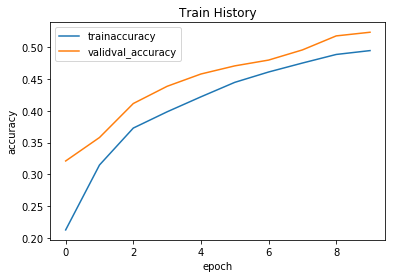

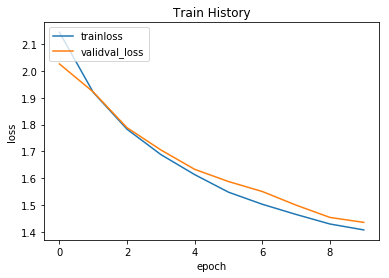

In [64]:
show_train_history(train_history_categorical, 'accuracy', 'val_accuracy')

show_train_history(train_history_categorical, 'loss', 'val_loss')

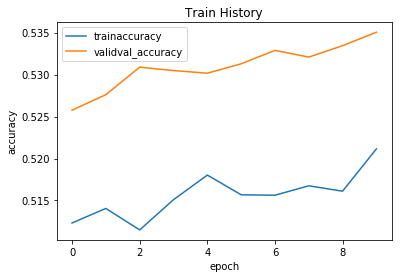

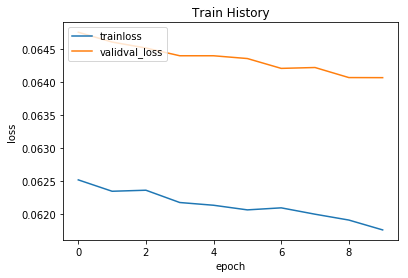

In [65]:
show_train_history(train_history_mse, 'accuracy', 'val_accuracy')

show_train_history(train_history_mse, 'loss', 'val_loss')

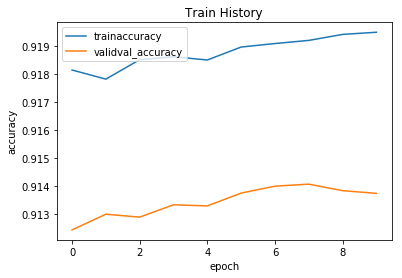

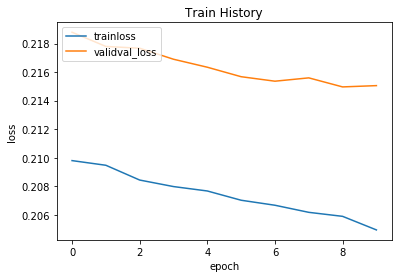

In [66]:
show_train_history(train_history_binary, 'accuracy', 'val_accuracy')

show_train_history(train_history_binary, 'loss', 'val_loss')